In [1]:
%load_ext autoreload

In [2]:
%autoreload

import sys
sys.path.append("../..")

import numpy as np
import darkhistory.physics as phys

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from plot_params import params
pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']


import darkhistory.low_energy.bound_free as bf

In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
/Users/hongwan/anaconda/envs/python3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in

Check the value of $\Theta$, and compare with Burgess MNRAS 69, 1 (1965) Table 1. 

In [3]:
n = 3

x_ary = np.array([
    0., 0.005, 0.010, 0.020, 0.040, 0.080, 0.160, 0.320, 0.640, 
    1.280, 2.560, 5.120, 10.240, 20.480, 40.960
])

bf.Theta(0, 1, n, np.array([np.sqrt(x)/n for x in x_ary]))

# for n = 3, l = 0 and lp = 1, the result should be 
# array([3.26878159e+00, 3.23581642e+00, 3.20332812e+00, 3.13974626e+00,
    #    3.01792190e+00, 2.79387132e+00, 2.41223295e+00, 1.84464612e+00,
    #    1.16637146e+00, 5.70920280e-01, 2.09318471e-01, 5.80348687e-02,
    #    1.25817791e-02, 2.21669018e-03, 3.29543524e-04])

array([3.26878159e+00, 3.23581642e+00, 3.20332812e+00, 3.13974626e+00,
       3.01792190e+00, 2.79387132e+00, 2.41223295e+00, 1.84464612e+00,
       1.16637146e+00, 5.70920280e-01, 2.09318471e-01, 5.80348687e-02,
       1.25817791e-02, 2.21669018e-03, 3.29543524e-04])

Check the value of $I$, and compare with Burgess MNRAS 69, 1 (1965) Table 2. 

In [4]:
T_ary_large = np.array([64, 32, 16, 8, 4, 2, 1.]) * 1e4 * phys.kB
T_ary_small = np.array([1./2., 1./4., 1./8., 1./16., 1./32., 1./64.]) * 1e4 * phys.kB

n = 5
l = 0
lp = 1

# For comparison with Burgess 1965, use rydberg = alpha^2 me / 2, which is not quite right. 


print(np.concatenate(
    ([(T / phys.kB / 1e4) * bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False, old_rydberg=True) for T in T_ary_large],
     [bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False) for T in T_ary_small])
))
n = 5
l = 2
lp = 1

print(np.concatenate(
    ([(T / phys.kB / 1e4) * bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False, old_rydberg=True) for T in T_ary_large],
     [bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False) for T in T_ary_small])
))

# for n = 5, l = 0, lp = 1
# array([44.22113959, 31.09493455, 20.4744184 , 12.63891471,  7.35965593,
        # 4.08304031,  2.18285182,  2.27335983,  2.32622893,  2.35483288,
        # 2.36929248,  2.37640332,  2.37989976])
# for n = 5, l = 2, lp = 1
# array([0.94498479, 0.89815897, 0.82453737, 0.71969013, 0.58731432,
    #    0.44177563, 0.3039484 , 0.38316254, 0.4473834 , 0.49230609,
    #    0.52010985, 0.53588686, 0.54434773])

[44.22113805 31.09493365 20.47441794 12.6389145   7.35965585  4.08304028
  2.18285181  2.27330529  2.32619853  2.354817    2.36928473  2.37639943
  2.37989799]
[0.94498473 0.89815892 0.82453732 0.71969009 0.5873143  0.44177562
 0.30394839 0.38310512 0.44734047 0.49227809 0.52009344 0.53587785
 0.54434303]


Generate the table of values of $g$. 

In [5]:
# %autoreload 2

# test = bf.generate_g_table_dict()

# import pickle

# pickle.dump(test, open('./g_table_dict_100.p', 'wb'))

Checks for $\alpha_{nl}$, calculation of $\beta_{nl}$ in comparison with the expectation from detailed balance applied to $\alpha_{nl}$, and the same for $\beta_B$. 

In [6]:
%autoreload

# Checks with Yacine's Effective Rates code.

n = 28
l = 2
T_r = 1.86e-2
T_m = 7.43e-3
print(bf.alpha_nl(n, l, T_m, T_r=T_r, stimulated_emission=True))
print(bf.alpha_nl(n, l, T_m, T_r=T_r, stimulated_emission=False))

T_r = 2.80721620e-03 * phys.rydberg

beta_B_calc = 0. 
beta_B_det_bal_calc = 0. 

for n in 2+np.arange(150-1):

    for l in np.arange(n):

        expected_beta_nl = (2*np.pi*phys.mu_ep*T_r)**(3/2) / (2*l + 1) / (2*np.pi*phys.hbar)**3 / phys.c**3 * (
            np.exp(-phys.rydberg / n**2 / T_r) * bf.alpha_nl(n, l, T_r, T_r=T_r, stimulated_emission=True)
        )
        calc_beta_nl = bf.beta_nl(n, l, T_r)

        beta_B_det_bal_calc += (2*l + 1) * expected_beta_nl * np.exp(-(1./4 - 1./n**2)*phys.rydberg/T_r)
        beta_B_calc += (2*l + 1) * calc_beta_nl * np.exp(-(1./4 - 1./n**2)*phys.rydberg/T_r)

        ratio = calc_beta_nl/expected_beta_nl

        if ratio < 0.9999: 

            print('n: ', n, ' l: ', l, ' ratio: ', ratio)

print(beta_B_det_bal_calc)
print(beta_B_calc)

computed_alpha_B = bf.alpha_B(T_r, T_r=T_r, n=150) 
beta_B_full_det_bal = computed_alpha_B * np.exp(-phys.rydberg/4./T_r) * (2*np.pi*phys.mu_ep*T_r)**(3/2) / (2*np.pi*phys.hbar)**3 / phys.c**3

print(beta_B_full_det_bal)

2.152428278949725e-15
1.5186319955279132e-15
1.8421900841856539e-31
1.8421900841856563e-31
1.8421900841856539e-31


# Comparison with Kotelnikov and Milstein arXiv:1810.08071

In [7]:
# Equation 37
def alpha_recomb_full_Kot(T_over_rydberg):

    return (
        8.414*(np.log(1 + 1./T_over_rydberg) + 3.499) * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.6517*T_over_rydberg +   0.2138*T_over_rydberg**(3/2))
    )

# Equation 38
def alpha_recomb_1_Kot(T_over_rydberg):

    return (
        17.41 * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.3593*T_over_rydberg**(7/6) + 0.1471*T_over_rydberg**(3/2))
    )

In [8]:
# Compute a table of alpha_B with stimulated emission, alpha_B without stimulated emission, 
# and beta_B. 

T_over_ryd_compute_ary = np.logspace(-5, 2, num=30)

n = 150

alpha_B_computed_with_stim = np.array([bf.alpha_B(T * phys.rydberg, T_r=T * phys.rydberg, stimulated_emission=True, n=n) for T in T_over_ryd_compute_ary])

alpha_B_computed_no_stim = np.array([bf.alpha_B(T * phys.rydberg, T_r=T * phys.rydberg, stimulated_emission=False, n=n) for T in T_over_ryd_compute_ary])

beta_B_computed = np.array([bf.beta_B(T * phys.rydberg, n=n) for T in T_over_ryd_compute_ary])

(10.0, 3000.0, 1e-14, 2e-10)

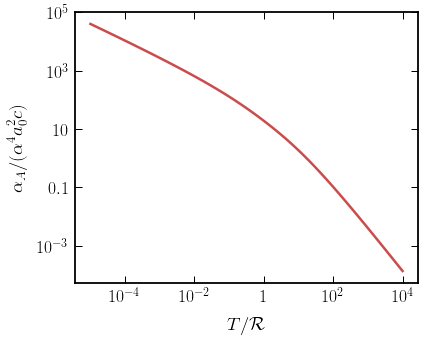

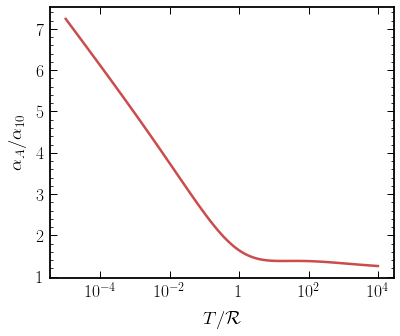

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


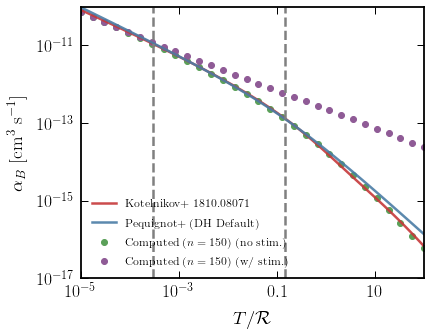

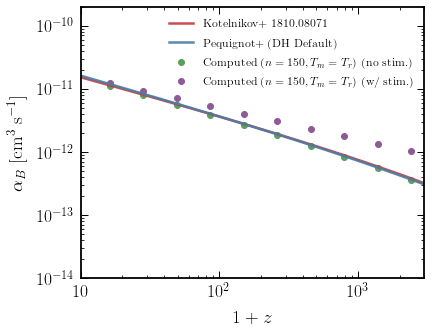

In [9]:
plt.figure()

T_over_ryd_ary = np.logspace(-5, 4, num=100)

plt.xscale('log')
plt.yscale('log')

plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) / (phys.alpha**4 * phys.c * phys.bohr_rad**2))

plt.xlabel(r'$T/\mathcal{R}$')
plt.ylabel(r'$\alpha_A / (\alpha^4 a_0^2 c)$')

plt.figure()

plt.xscale('log')

plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) / alpha_recomb_1_Kot(T_over_ryd_ary))

plt.xlabel(r'$T/\mathcal{R}$')
plt.ylabel(r'$\alpha_A / \alpha_{10}$')

plt.figure()

plt.xscale('log')
plt.yscale('log')

Kot_plot, = plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary), label ='Kotelnikov+ 1810.08071' )
Pequignot_plot, = plt.plot(T_over_ryd_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim, color=cols_default[2], label=r'Computed $(n = 150)$ (no stim.)')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim, color=cols_default[3], label=r'Computed $(n = 150)$ (w/ stim.)')
plt.legend(handles=[Kot_plot, Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B$ [cm$^3$ s$^{-1}$]')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')

plt.axis([1e-5, 100, 1e-17, 1e-10])

plt.figure()

plt.xscale('log')
plt.yscale('log')

rs_ary = T_over_ryd_ary * phys.rydberg / phys.TCMB(1)
rs_compute_ary = T_over_ryd_compute_ary * phys.rydberg / phys.TCMB(1) 

Kot_plot, = plt.plot(rs_ary, alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary), label ='Kotelnikov+ 1810.08071' )
Pequignot_plot, = plt.plot(rs_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(rs_compute_ary, alpha_B_computed_no_stim, color=cols_default[2], label=r'Computed $(n = 150, T_m = T_r)$ (no stim.)')
computed_with_stim_plot = plt.scatter(rs_compute_ary, alpha_B_computed_with_stim, color=cols_default[3], label=r'Computed $(n = 150, T_m = T_r)$ (w/ stim.)')

plt.legend(handles=[Kot_plot, Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$1+z$')
plt.ylabel(r'$\alpha_B$ [cm$^3$ s$^{-1}$]')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')

plt.axis([10, 3000, 1e-14, 2e-10])

(1e-05, 100.0, 0.5, 1.5)

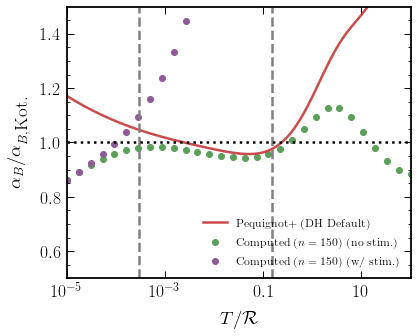

In [10]:
plt.figure()
plt.xscale('log')

Kot_compare_Pequignot = alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary)
Kot_compare_computed  = alpha_recomb_full_Kot(T_over_ryd_compute_ary) - alpha_recomb_1_Kot(T_over_ryd_compute_ary)

Pequignot_plot, = plt.plot(T_over_ryd_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125 / Kot_compare_Pequignot, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim / Kot_compare_computed, color=cols_default[2], label=r'Computed $(n = 150)$ (no stim.)')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim / Kot_compare_computed, color=cols_default[3], label=r'Computed $(n = 150)$ (w/ stim.)')

plt.legend(handles=[Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B / \alpha_{B,\textrm{Kot.}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

plt.axis([1e-5, 100, 0.5, 1.5])

(1e-05, 100.0, 0.5, 1.5)

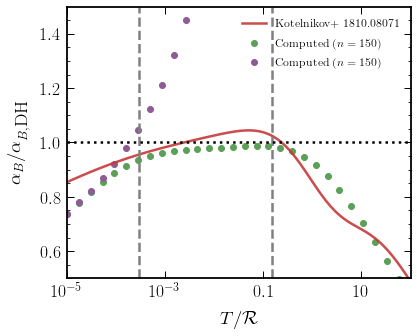

In [11]:
plt.figure()
plt.xscale('log')

DH_compare_Kot = phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125
DH_compare_computed  = phys.alpha_recomb(T_over_ryd_compute_ary * phys.rydberg, 'HI') / 1.125

Kot_plot, = plt.plot(T_over_ryd_ary, (alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary)) / DH_compare_Kot, label='Kotelnikov+ 1810.08071')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim / DH_compare_computed, color=cols_default[2], label=r'Computed $(n = 150)$')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim / DH_compare_computed, color=cols_default[3], label=r'Computed $(n = 150)$')

plt.legend(handles=[Kot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B / \alpha_{B,\textrm{DH}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

plt.axis([1e-5, 100, 0.5, 1.5])

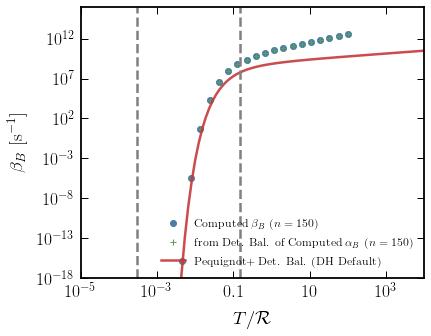

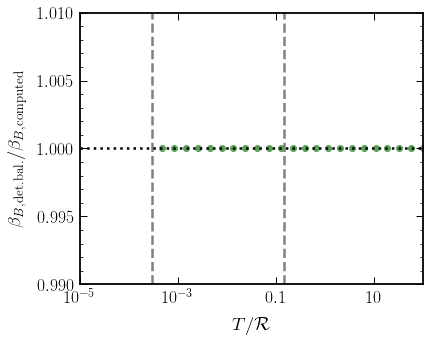

In [12]:
plt.figure() 
plt.xscale('log')
plt.yscale('log')

DH_beta = phys.beta_ion(T_over_ryd_ary * phys.rydberg, 'HI')

beta_B_computed_det_bal = (
    (2 * np.pi * phys.mu_ep * T_over_ryd_compute_ary * phys.rydberg)**(3/2) 
    / (2*np.pi*phys.hbar*phys.c)**3 * alpha_B_computed_with_stim 
    * np.exp(-1./4./T_over_ryd_compute_ary)
) 

DH_beta_plot, = plt.plot(T_over_ryd_ary, DH_beta, label='Pequignot+ Det. Bal. (DH Default)')
computed_plot = plt.scatter(T_over_ryd_compute_ary, beta_B_computed, label=r'Computed $\beta_B$ $(n = 150)$', color=cols_default[1])
det_bal_plot  = plt.scatter(T_over_ryd_compute_ary, beta_B_computed_det_bal, label=r'from Det. Bal. of Computed $\alpha_B$ $(n = 150)$', marker='+', color=cols_default[2], linewidth=1)

plt.legend(handles=[computed_plot, det_bal_plot, DH_beta_plot], fontsize=12)

plt.axis([1e-5, 1e4, 1e-18, 1e16])

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\beta_B$ [s$^{-1}$]')
plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')


plt.figure() 
plt.xscale('log')

det_bal_plot  = plt.scatter(T_over_ryd_compute_ary[7:], beta_B_computed_det_bal[7:]/beta_B_computed[7:], label=r'from Det. Bal. of Computed $\alpha_B$', color=cols_default[2])


plt.axis([1e-5, 1e2, .99, 1.01])

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\beta_{B,\mathrm{det. bal.}}/\beta_{B,\mathrm{computed}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

In [13]:
%%prun

bf.alpha_B(2 * phys.rydberg, T_r=2*phys.rydberg, n=100)

         318191 function calls in 3.683 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10098    1.025    0.000    2.113    0.000 bound_free.py:270(integ)
    40392    0.873    0.000    0.873    0.000 {built-in method posix.stat}
    10098    0.560    0.000    1.088    0.000 bound_free.py:149(Theta)
    10098    0.355    0.000    3.488    0.000 bound_free.py:205(I_Burgess)
    10098    0.184    0.000    0.184    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     5049    0.175    0.000    3.663    0.001 bound_free.py:303(alpha_nl)
    40392    0.121    0.000    1.081    0.000 config.py:174(load_data)
    10098    0.080    0.000    0.300    0.000 fromnumeric.py:73(_wrapreduction)
    20196    0.080    0.000    0.418    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    40392    0.078    0.000    0.960    0.000 genericpath.py:39(isdir)
    10098    0.038    0.000    0.338    0.000 fromnume

# Testing the $f_\gamma$ Functionality

In [35]:
%autoreload

# Compute a table of alpha_B with stimulated emission, alpha_B without stimulated emission, 
# and beta_B. 

T_over_ryd_compute_ary = np.logspace(-5, 2, num=30)

n = 150

alpha_B_computed_with_stim_f = np.zeros_like(T_over_ryd_compute_ary)
beta_B_computed_f = np.zeros_like(T_over_ryd_compute_ary)

for i,T_ratio in enumerate(T_over_ryd_compute_ary):

    print(i) 

    def f_BB(E_gamma):

        T = T_ratio*phys.rydberg

        return np.exp(-E_gamma/T) / (1. - np.exp(-E_gamma/T))

    alpha_B_computed_with_stim_f[i] = bf.alpha_B(
        T_ratio * phys.rydberg, f_gamma=f_BB,
        stimulated_emission = True, n = n
    )

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
print(alpha_B_computed_with_stim_f / alpha_B_computed_with_stim)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# $\alpha_B$ and $\beta_B$ checks

### Reproducing case-B Recombination Coefficients

In [ ]:
rs_vec = 10**np.arange(1,4,.1)
Tr_vec = phys.TCMB(rs_vec)
Tm_vec = phys.Tm_std(rs_vec)
length = len(rs_vec)

In [ ]:
def alpha_recomb_full_Kot(T_over_rydberg):
    return (
        8.414*(np.log(1 + 1./T_over_rydberg) + 3.499) * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.6517*T_over_rydberg +   0.2138*T_over_rydberg**(3/2))
    )
def alpha_recomb_1_Kot(T_over_rydberg):
    return (
        17.41 * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.3593*T_over_rydberg**(7/6) + 0.1471*T_over_rydberg**(3/2))
    )

In [ ]:
# Tm^1/2 * alpha_B from Hummer 1994 MNRAS
Tm_alphaB_Hummer = np.array([
    9.283e-11, 8.823e-11, 8.361e-11,
    7.898e-11, 7.435e-11, 6.973e-11,
    6.512e-11, 6.054e-11, 5.599e-11,
    5.147e-11, 4.700e-11, 4.258e-11,
    3.823e-11, 3.397e-11, 2.983e-11,
    2.584e-11, 2.204e-11, 1.847e-11,
    1.520e-11, 1.226e-11, 9.696e-12,
    7.514e-12, 5.710e-12, 4.257e-12,
    3.117e-12, 2.244e-12, 1.590e-12,
    1.110e-12, 7.642e-13, 5.199e-13,
3.498e-13])

#Convert to eV
Tm_Hummer = 10**np.arange(1,7.2,.2)*phys.kB

alphaB_Hummer = interp1d(Tm_Hummer, Tm_alphaB_Hummer/np.sqrt(Tm_Hummer/phys.kB))

In [1]:
%autoreload
# alpha_B requires many excited states to converge (see Hummer Fig. 1)
nmax = 100
Delta_f = lambda a : 0

alpha_tot=np.zeros(length)
alpha_tot_Hongwan=np.zeros(length)
for i, rs in enumerate(rs_vec):
    Tm = phys.Tm_std(rs)

#     k2_tab, g = atomic.populate_k2_and_g(nmax, Tm)
#     alpha = atomic.populate_alpha(Tm, phys.TCMB(rs)/1e20, nmax, k2_tab, g)
#     alpha_tot[i] = np.sum(alpha)
    alpha_tot_Hongwan[i] = bf.alpha_B(Tm,stimulated_emission=False, n=nmax)
    print(rs, alpha_tot_Hongwan[i])
    
#!!! Need to double-check the stimulated emission coefficient

NameError: name 'length' is not defined

In [ ]:
if nmax==10:
    alpha_tot10 = alpha_tot.copy()
elif nmax==20:
    alpha_tot20 = alpha_tot.copy()
elif nmax==50:
    alpha_tot50 = alpha_tot.copy()
elif nmax==100:
    alpha_tot100 = alpha_tot.copy()
elif nmax==300:
    alpha_tot300 = alpha_tot.copy()

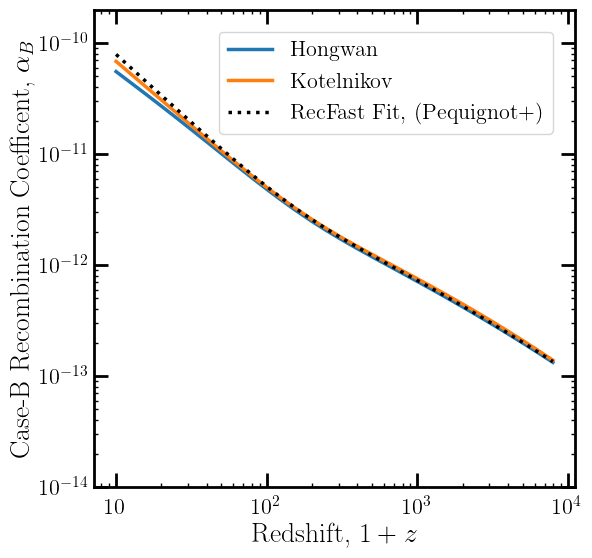

In [ ]:
plt.figure()
plt.loglog()
plt.ylim([1e-14,2e-10])

# plt.plot(rs_vec[Tm_vec>8e-4], alphaB_Hummer(Tm_vec[Tm_vec>8e-4]), label='Hummer 1994')

# plt.plot(rs_vec, alpha_tot10, label=r'DH, $n_{\mathrm{max}}=10$')
# plt.plot(rs_vec, alpha_tot20, label=r'DH, $n_{\mathrm{max}}=20$')
# plt.plot(rs_vec, alpha_tot50, label=r'DH, $n_{\mathrm{max}}=50$')
# plt.plot(rs_vec, alpha_tot100, label=r'DH, $n_{\mathrm{max}}=100$')
# plt.plot(rs_vec, alpha_tot300, label=r'DH, $n_{\mathrm{max}}=300$')

plt.plot(rs_vec, alpha_tot_Hongwan, label=r'Hongwan')

tmp = alpha_recomb_full_Kot(Tm_vec/phys.rydberg)-alpha_recomb_1_Kot(Tm_vec/phys.rydberg)
plt.plot(rs_vec, tmp, label=r'Kotelnikov')
plt.plot(rs_vec, phys.alpha_recomb(Tm_vec, 'HI')/1.125, label='RecFast Fit, (Pequignot+)', color='k', linestyle=':')
plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Case-B Recombination Coefficent, $\alpha_B$', fontsize=20)
plt.legend()

$\beta_B$ is obtained by detailed balance. 
First, use $x_i \beta_i \sim \frac1{g_i}e^{-E_i/T_m}\alpha_i$.
Next, assume $x_i = x_{2s}\frac{g_i}{g_{2s}} e^{-(E_2-E_i)/T_m}$. 
Finally, write the ionization term in the $x_e$ evolution equation as 
$$
\sum_i \beta_i x_i = x_{2s}\frac{g_i}{g_{2s}} e^{-(E_2-E_i)/T_m} \sim x_{2s}e^{-E_2/T_m} \alpha_B \sim \beta_B x_{2s}
$$
So a cross-cheeck of $\alpha_B$ is a cross-check of $\beta_B$.

# Detailed Balance Checks

The TLA assumes that the excited states obey the detailed balance condition
$$
\begin{alignat}{1}
	\frac{x_i}{x_{2s}} = g_i e^{-(E_i-E_\alpha)/T} \, ,
\end{alignat}
$$
that the $n=2$ state obeys
$$
\begin{alignat}{1}
	x_2 = & \frac{x_{1s}e^{-E_\alpha/T} (3 R_{\text{Ly}\alpha} + \Lambda_{2s}) + x_e^2 n_H \alpha_\text{B}}{
	\frac34 R_{\text{Ly}\alpha} + \frac14 \Lambda_{2s} + \beta_\text{B}}   \, ,
\end{alignat}
$$
and that the substates satisfy 
$$
\begin{alignat}{1}
	x_{2p} = & \frac34 x_2 \\
    x_{2s} = & \frac14 x_2 \, .
\end{alignat}
$$

We also assume that the excited state abundances are so exponentially suppressed that $$x_{1s} = 1-x_e \, .$$
Let us now see if we can reproduce this behavior.

In [ ]:
# Undetailed balance: Seeing that each line of the MLA is satisfied 
# by x_i in LTE

num_states = int((n+1)*n/2)
states_n = np.concatenate([list(map(int,k*np.ones(k))) for k in range(1,nmax+1,1)])
states_l = np.concatenate([np.arange(k) for k in range(1,nmax+1)])

x_lte = np.zeros(num_states)
x_lte[0] = x1s
for nl in np.arange(num_states):
    n = states_n[nl]
    l = states_l[nl]
    x_lte[nl] = g_nl(l) * np.exp((E(n)-E(1))/Tr) * x1s

diff_vec = np.zeros(num_states)

def nl_vec(n,l):
    return int((n-1)*n/2)+l

# x_tmp = np.zeros(num_states)
# x_tmp[0] = x1s

# for nl in np.arange(1, num_states):
#     n = states_n[nl]
#     l = states_l[nl]
#     x_tmp[nl] = g_nl(l) * np.exp((E(n)-E(1))/Tr) * x_tmp[0]
    

for nl in np.arange(1, num_states):
    n = states_n[nl]
    l = states_l[nl]
    R_tot = np.sum(BB['dn'][n, :, l] + BB['up'][n, :, l]) + beta[n][l]
    if nl != num_states-1:
        diff_vec[nl] = (-x_lte[nl] + np.sum(
            BB['dn'][1:,n,l+1]/R_tot*x_lte[np.array([nl_vec(n,l+1) for n in np.arange(1,nmax+1)])]
            +BB['up'][1:,n,l-1]/R_tot*x_lte[np.array([nl_vec(n,l-1) for n in np.arange(1,nmax+1)])]
        ) + xe**2 * nH * alpha[n][l]/R_tot)
    else:
        diff_vec[nl] = (-x_lte[nl] + np.sum(
            BB['up'][1:,n,l-1]/R_tot*x_lte[np.array([nl_vec(n,l-1) for n in np.arange(1,nmax+1)])]
        ) + xe**2 * nH * alpha[n][l]/R_tot)
        
    if nl==1:
#         diff_vec[nl] -= BB['dn'][2,1,0]/R_tot*x_lte[1]
        diff_vec[nl] += BB['dn'][2,1,0]*np.exp((E(2)-E(1))/Tr)/R_tot*x_lte[0]
        
    print(n,l,diff_vec[nl]/x_lte[nl])
    
print(np.linalg.norm(diff_vec)/np.linalg.norm(x_lte))

2 0 4.668917149747172e-16
2 1 5.3612157280822e-16
3 0 -1.1158988923751275e-15
3 1 -1.9122211066522137e-16
3 2 -1.167764615541859e-15
4 0 2.1687042314226585e-15
4 1 4.953213368064096e-16
4 2 1.9277370945979186e-15
4 3 2.5186803110966856e-15
5 0 4.960016261403872e-16
5 1 0.0
5 2 3.1000101633774196e-16
5 3 7.085737516291245e-17
5 4 -3.6511230813111836e-16
6 0 5.887032742429433e-16
6 1 -1.700698347812947e-16
6 2 -3.139750795962364e-16
6 3 -2.466947053970429e-16
6 4 1.875128947588634e-16
6 5 9.365733908410462e-16
7 0 -2.5337429841951354e-15
7 1 -9.0490820864112e-16
7 2 -2.9138044318244054e-15
7 3 -3.024978868886029e-15
7 4 -2.825324518090608e-15
7 5 -2.5748751754970043e-15
7 6 -2.4067077933666706e-15
8 0 -4.962096541070434e-17
8 1 -9.924193082140867e-17
8 2 -7.343902880784242e-16
8 3 -2.55193536397908e-16
8 4 -7.71881684166512e-17
8 5 2.7065981133111455e-16
8 6 8.397394146426888e-16
8 7 6.798072261266494e-16
9 0 1.2687103641443744e-15
9 1 1.7620977279782976e-17
9 2 7.189358730151454e-16
9 3

In [ ]:
%autoreload
rs_vec  = 10**np.arange(1,4.55,.01)
Tr_vec  = phys.TCMB(rs_vec)
Tm_vec  = phys.Tm_std(rs_vec)

length  = len(rs_vec)

xe_vec  = phys.xHII_std(rs_vec)
x1s_vec = phys.xHI_std(rs_vec)
nH_vec  = phys.nH * rs_vec**3

tau_vec = atomic.tau_np_1s(2,rs_vec)
x2s_vec = atomic.x2s_steady_state(rs_vec, Tr_vec, Tm_vec, xe_vec, x1s_vec, tau_vec)
x2_vec  = 4*x2s_vec

In [ ]:
def g_nl(l): return 2*l +1
def E(n): return phys.rydberg/n**2
hc = 2*np.pi*phys.hbar * phys.c

### Checking Detailed Balance

In [ ]:
%autoreload

#Detailed Balance between recombination and ionization
rs = 3e3
Tr = phys.TCMB(rs)
Tm = Tr#phys.Tm_std(rs)
xe = phys.xHII_std(rs)
nH = phys.nH * rs**3
x1s = phys.xHI_std(rs)

nmax=9
new_switch=True
R = atomic.populate_radial(nmax)
BB = atomic.populate_bound_bound(nmax, Tr, R, Delta_f=Delta_f)
k2_tab, g = atomic.populate_k2_and_g(nmax, Tm)
alpha = atomic.populate_alpha(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)
beta = atomic.populate_beta(Tm, Tr, nmax, k2_tab, g, Delta_f=Delta_f, new_switch=new_switch)

hplanck=2*np.pi*phys.hbar
lam_T = hplanck*phys.c/(2*np.pi * phys.mu_ep * Tr)**(1/2)

for n in np.arange(1,nmax+1):
    for l in np.arange(0,n):
        fac = np.exp(phys.rydberg/n**2/Tr)*g_nl(l)*lam_T**3
        if new_switch:
            fac *= ((1/2*phys.mu_ep*phys.alpha**2)/phys.rydberg)**(3/2)
        
        print(n,l,':', beta[n][l]/alpha[n][l] * fac)

1 0 : 0.9999999999999992
2 0 : 1.0
2 1 : 0.9999999999999999
3 0 : 1.0000000000000004
3 1 : 1.0000000000000002
3 2 : 1.0000000000000004
4 0 : 1.0000000000000004
4 1 : 1.0000000000000004
4 2 : 1.0000000000000004
4 3 : 1.0000000000000004
5 0 : 1.0000000000000002
5 1 : 1.0000000000000002
5 2 : 1.0000000000000007
5 3 : 1.0
5 4 : 0.9999999999999997
6 0 : 1.0000000000000002
6 1 : 1.0000000000000004
6 2 : 1.0000000000000004
6 3 : 1.0000000000000004
6 4 : 1.0000000000000002
6 5 : 1.0000000000000007
7 0 : 1.0000000000000004
7 1 : 1.0000000000000004
7 2 : 1.0000000000000002
7 3 : 1.0000000000000004
7 4 : 1.0
7 5 : 1.0000000000000007
7 6 : 1.0
8 0 : 1.0000000000000002
8 1 : 1.0
8 2 : 1.0000000000000004
8 3 : 1.0000000000000004
8 4 : 1.0000000000000007
8 5 : 1.0000000000000004
8 6 : 1.0000000000000004
8 7 : 1.0
9 0 : 0.9999999999999997
9 1 : 0.9999999999999999
9 2 : 0.9999999999999997
9 3 : 0.9999999999999998
9 4 : 0.9999999999999998
9 5 : 1.0
9 6 : 1.0
9 7 : 1.0000000000000002
9 8 : 1.000000000000

In [ ]:
%autoreload
#Saha equilibrium

rhs = lam_T**-3 / (phys.nH*rs**3) * np.exp(-phys.rydberg/Tr)
phys.xHI_std(rs) * rhs/xe**2

0.9999999999999999

In [ ]:
#The main discrepancy comes from the fact that 
#this quantity doesn't keep track of stimulated emission

phys.alpha_recomb(Tr,'HI')/1.125

3.0849766757476206e-13

In [ ]:
bf.alpha_B(Tr, T_r=Tr, stimulated_emission=False, f_gamma=None, n=100)

3.035234831208717e-13

In [ ]:
bf.alpha_B(Tr, T_r=Tr, stimulated_emission=True, f_gamma=None, n=100)

8.381778979913012e-13

In [ ]:
%autoreload
lam_T = hc/(2*np.pi * phys.mu_ep * Tr)**(1/2)
bf.beta_B(Tr,100) * np.exp(phys.rydberg/4 / Tr)*lam_T**3 * 4

3.3527115919652024e-12

In [ ]:
# The main discrepancy comes from stimulated emission
bf.beta_B(Tr,300)

15583698.007294443

In [ ]:
phys.beta_ion(Tr,'HI')

1242495.87664493

In [ ]:
# Detailed Balance amongst the bound-bound transition rates
print('n1 l n2')
n1,l = 1,0
for n2 in np.arange(2,nmax+1):
    Ennp = E(n1)-E(n2)
    print(n1,'',l,n2,':',
          BB['up'][n1][n2][l]/(BB['dn'][n2][n1][l+1])/(
         np.exp(-Ennp/Tr)*g_nl(l+1)/g_nl(l)))
for n1 in np.arange(2,nmax+1):
    for n2 in np.arange(1,n1):
        for l in np.arange(1,n2):
            Ennp = E(n1)-E(n2)
            print(n1,'',l,n2,':',
                  BB['dn'][n1][n2][l]/(BB['up'][n2][n1][l-1])/(
                 np.exp(-Ennp/Tr)*g_nl(l-1)/g_nl(l)))

n1 l n2
1  0 2 : 1.0000000000000002
1  0 3 : 1.0000000000000002
1  0 4 : 0.9999999999999999
1  0 5 : 0.9999999999999998
1  0 6 : 0.9999999999999999
1  0 7 : 1.0000000000000002
1  0 8 : 1.0
1  0 9 : 0.9999999999999998
3  1 2 : 1.0
4  1 2 : 1.0
4  1 3 : 1.0
4  2 3 : 0.9999999999999999
5  1 2 : 0.9999999999999991
5  1 3 : 0.9999999999999997
5  2 3 : 0.9999999999999998
5  1 4 : 1.0
5  2 4 : 0.9999999999999998
5  3 4 : 1.0000000000000002
6  1 2 : 1.0000000000000002
6  1 3 : 1.0
6  2 3 : 0.9999999999999999
6  1 4 : 1.0
6  2 4 : 1.0
6  3 4 : 1.0
6  1 5 : 1.0
6  2 5 : 0.9999999999999997
6  3 5 : 1.0
6  4 5 : 0.9999999999999999
7  1 2 : 1.0
7  1 3 : 1.0
7  2 3 : 0.9999999999999999
7  1 4 : 0.9999999999999999
7  2 4 : 1.0
7  3 4 : 1.0
7  1 5 : 1.0000000000000002
7  2 5 : 1.0
7  3 5 : 1.0000000000000004
7  4 5 : 1.0000000000000002
7  1 6 : 1.0000000000000002
7  2 6 : 1.0000000000000002
7  3 6 : 1.0000000000000002
7  4 6 : 1.0
7  5 6 : 1.0000000000000002
8  1 2 : 0.9999999999999999
8  1 3 : 0.9999

In [ ]:
print('n1 l n2')
for n1 in np.arange(2,nmax+1):
    for n2 in np.arange(1,n1):
        for l in np.arange(1,n2):
            Ennp = E(n1)-E(n2)
            print(n1,'',l,n2,':',
                  BB['dn'][n1][n2][l]/(BB['up'][n2][n1][l-1])/(
                 np.exp(-Ennp/Tr)*g_nl(l-1)/g_nl(l)))

n1 l n2
3  1 2 : 1.0
4  1 2 : 1.0
4  1 3 : 1.0
4  2 3 : 0.9999999999999999
5  1 2 : 0.9999999999999991
5  1 3 : 0.9999999999999997
5  2 3 : 0.9999999999999998
5  1 4 : 1.0
5  2 4 : 0.9999999999999998
5  3 4 : 1.0000000000000002
6  1 2 : 1.0000000000000002
6  1 3 : 1.0
6  2 3 : 0.9999999999999999
6  1 4 : 1.0
6  2 4 : 1.0
6  3 4 : 1.0
6  1 5 : 1.0
6  2 5 : 0.9999999999999997
6  3 5 : 1.0
6  4 5 : 0.9999999999999999
7  1 2 : 1.0
7  1 3 : 1.0
7  2 3 : 0.9999999999999999
7  1 4 : 0.9999999999999999
7  2 4 : 1.0
7  3 4 : 1.0
7  1 5 : 1.0000000000000002
7  2 5 : 1.0
7  3 5 : 1.0000000000000004
7  4 5 : 1.0000000000000002
7  1 6 : 1.0000000000000002
7  2 6 : 1.0000000000000002
7  3 6 : 1.0000000000000002
7  4 6 : 1.0
7  5 6 : 1.0000000000000002
8  1 2 : 0.9999999999999999
8  1 3 : 0.9999999999999998
8  2 3 : 1.0
8  1 4 : 1.0000000000000002
8  2 4 : 1.0
8  3 4 : 1.0
8  1 5 : 0.9999999999999998
8  2 5 : 0.9999999999999999
8  3 5 : 1.0
8  4 5 : 1.0
8  1 6 : 1.0000000000000002
8  2 6 : 1.00000000

In [ ]:
#Saha equilibrium at large redshift between xe = xHII and x1s ~ xHI
hc = 2*np.pi * phys.hbar*phys.c
mu_e = phys.me/(1+phys.me/phys.mp)
lam_T = hc/(2*np.pi * mu_e*Tr_vec)**(1/2)

(phys.xHI_std(rs_vec)/nH_vec/xe_vec**2)*np.exp(-E(1)/Tr_vec)/g_nl(0)/lam_T**3

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

# Recombination Spectrum

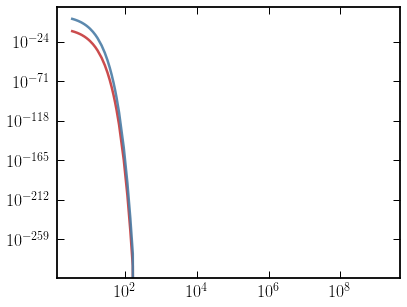

In [135]:
%autoreload 
T = 0.25
recomb = bf.gamma_nl(2, 0, T, T_r=T)
photoion = bf.xi_nl(2, 0, T)


plt.figure()

plt.loglog(recomb.eng, recomb.dNdE*recomb.eng**2)
plt.loglog(photoion.eng, photoion.dNdE*photoion.eng**2)

# plt.axis([0, 1e4, 1e-20, 1e-12])

In [223]:
%autoreload

eng = np.logspace(-5, 5, num=300)

rs = 1000
T = phys.TCMB(rs)

recomb_spec = bf.gamma_B(eng, T, T_r=T, n=100)
photoion_spec = bf.xi_B(eng, T, n=100)

photoion_spec_det_bal = (
    (2 * np.pi * phys.mu_ep * T)**(3/2) 
    / (2*np.pi*phys.hbar*phys.c)**3 * recomb_spec 
    * np.exp(-phys.rydberg/4./T)
) 


../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


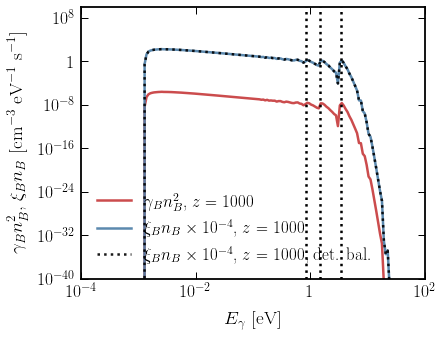

In [234]:
plt.figure()

plt.loglog()

plt.plot(recomb_spec.eng, recomb_spec.dNdE * phys.nB**2 * rs**6, label=r'$\gamma_B n_B^2$, $z = 1000$')
plt.plot(photoion_spec.eng, photoion_spec.dNdE * phys.nB * rs**3 * 1e-4, label=r'$\xi_B n_B \times 10^{-4}$, $z = 1000$')
plt.plot(
    photoion_spec_det_bal.eng, 
    photoion_spec_det_bal.dNdE * phys.nB * rs**3 * 1e-4, 
    label=r'$\xi_B n_B \times 10^{-4}$, $z = 1000$, det. bal.',
    linestyle=':', 
    color='k'
)

plt.xlabel(r'$E_\gamma$ [eV]')
plt.ylabel(r'$\gamma_B n_B^2$, $\xi_B n_B$ [cm$^{-3}$ eV$^{-1}$ s$^{-1}$]')

plt.legend()

plt.axis([1e-4, 1e2, 1e-40, 1e10])

plt.axvline(phys.rydberg/4, color='k', linestyle=':')
plt.axvline(phys.rydberg/9, color='k', linestyle=':')
plt.axvline(phys.rydberg/16, color='k', linestyle=':')

In [225]:
print('Integral of recombination coefficient: ' , recomb_spec.totN())
print('alpha_B: ', bf.alpha_B(T, T_r = T))
print('Integral of photoionization coefficient: ', photoion_spec.totN())
print('beta_B: ', bf.beta_B(T))

Integral of recombination coefficient:  1.4311628734815086e-12
alpha_B:  1.427518755189396e-12
Integral of photoionization coefficient:  254.18246027688164
beta_B:  253.53524466628113


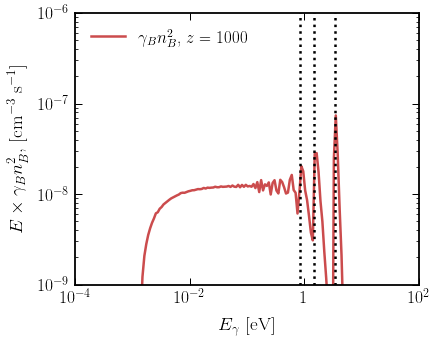

In [235]:
plt.figure()

plt.loglog()

plt.plot(recomb_spec.eng, recomb_spec.dNdE*recomb_spec.eng * phys.nB**2 * rs**6, label=r'$\gamma_B n_B^2$, $z = 1000$')
# plt.plot(photoion_spec.eng, photoion_spec.dNdE*photoion_spec.eng * phys.nB * rs**3 * 1e-4, label=r'$\xi_B n_B \times 10^{-4}$, $z = 1000$')
# plt.plot(
#     photoion_spec_det_bal.eng, 
#     photoion_spec_det_bal.dNdE*photoion_spec_det_bal.eng**2 * phys.nB * rs**3 * 1e-4, 
#     label=r'$\xi_B n_B \times 10^{-4}$, $z = 1000$, det. bal.',
#     linestyle=':', 
#     color='k'
# )

plt.xlabel(r'$E_\gamma$ [eV]')
plt.ylabel(r'$E \times \gamma_B n_B^2$, [cm$^{-3}$ s$^{-1}$]')

plt.legend()

plt.axis([1e-4, 1e2, 1e-9, 1e-6])

plt.axvline(phys.rydberg/4, color='k', linestyle=':')
plt.axvline(phys.rydberg/9, color='k', linestyle=':')
plt.axvline(phys.rydberg/16, color='k', linestyle=':')